<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">


# Introduction to Hierarchical Clustering

_Instructor: Aymeric Flaisler_

---

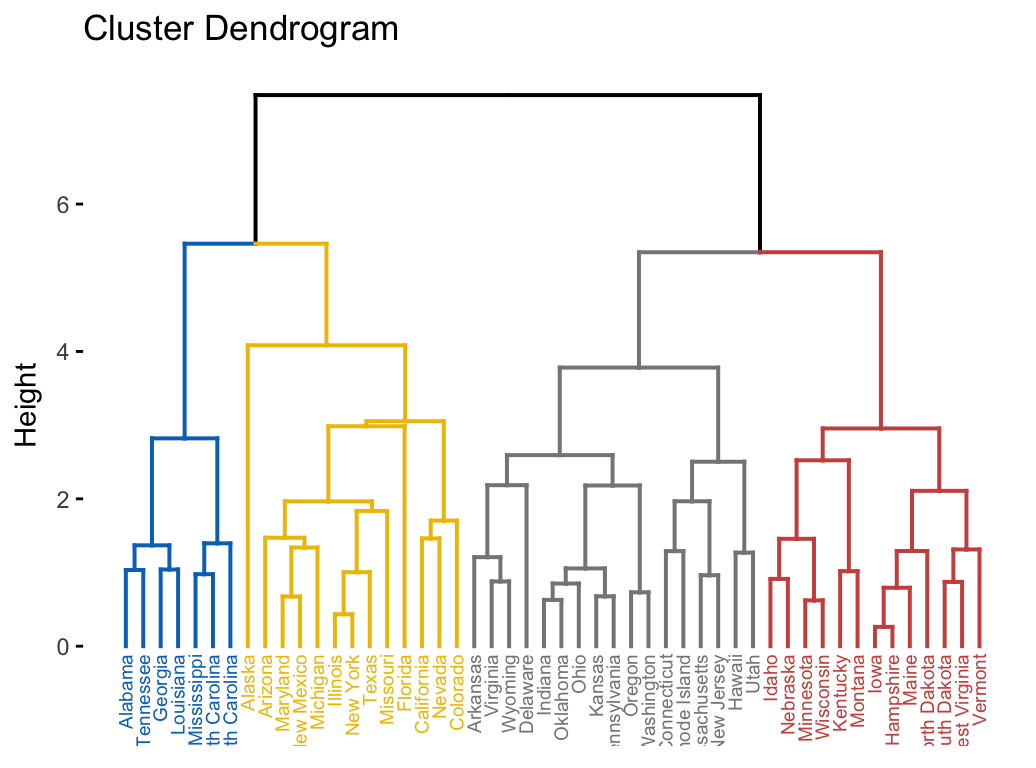


### Learning Objectives
*After this lesson, you will be able to:*
- Learn the hierarchical clustering algorithm
- Understand the differences between K-Means and hierarchical clustering
- Plot, analyze, and understand the Dendrogram
- Practice hierarchical clustering
- Gain an intuition for how clusters are selected with an interactive visualization

### Lesson Guide
- [What is hierarchical clustering?](#what-is)
- [When does hierarchical clustering perform well?](#when)
- [How is hierarchical clustering different from K-Means clustering?](#how)
- [How does hierarchical clustering work?](#how-work)
- [Single linkage: step-by-step](#single)
- [Hierarchical clustering in python](#python)
    - [Evaluation with the cophenetic correlation coefficient](#coph)
- [Intuition behind the cophenetic correlation coefficient](#intuition)
- [Visualizing hierarchical clustering on language skills data](#guided-practice)
- [Conclusion](#conclusion)
- [Additional resources](#resources)

<a name="what-is"></a>
## What is hierarchical clustering?

---

Hierarchical clustering, like k-means clustering, is another common form of clustering analysis. With this type of clustering we seek to do exactly what the name suggests: 

- Build hierarchies of clusters.
- Connect the clusters in the hierarchy with links.

Once the links are determined, we can display them in what is called a **dendrogram** - a graph that displays all of these links in their hierarchical structure.

![denex](./assets/denex.png)

To find clusters in a dendrogram, we can cut the graph to find the clusters - we'll go over this later in the lesson. 


<a id='when'></a>
## When does hierarchical clustering perform well?

---

- Hierarchical clustering works well for **non-spherical clusters**
- It also works well on **smaller datasets** - _this algorithm has a longer computational time and doesn't work well for larger datasets_


#### Hierarchical clustering works well when the underlying data has a hierarchical structure and you want to recover the hierarchy.


**In hierarchical clustering, the algorithm builds classification trees using the data that merge groups of similar data points.**

**Hierarchical clustering does not require you to define "K" as an input!**

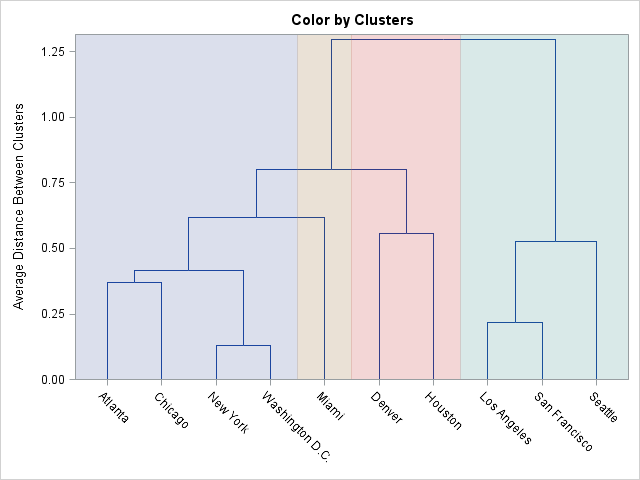





**K-Means**
- Aims to to achieve separation.
- Partitions are independent of each other.

**Hierachical Clustering**
- Partitions can be visualized using a tree structure (a dendrogram).
- Does not need the number of clusters as input.
- Possible to view partitions at different levels of granularities (i.e., can refine/coarsen clusters) using different K
- Guaranteed to converge to the same solution (no random initialization).


### In short:

Whereas k-means tries to optimize a **global goal** (variance of the clusters) and achieves a local optimum, agglomerative hierarchical clustering aims at finding **the best step at each cluster fusion** (greedy algorithm) which is done exactly but may result in a potentially suboptimal solution.

### In other words:

Let's say that the clusters have some underlying probability density f that we don't have access too.
A very natural and intuitive approach is to say that the clusters of f are the regions of high density. 

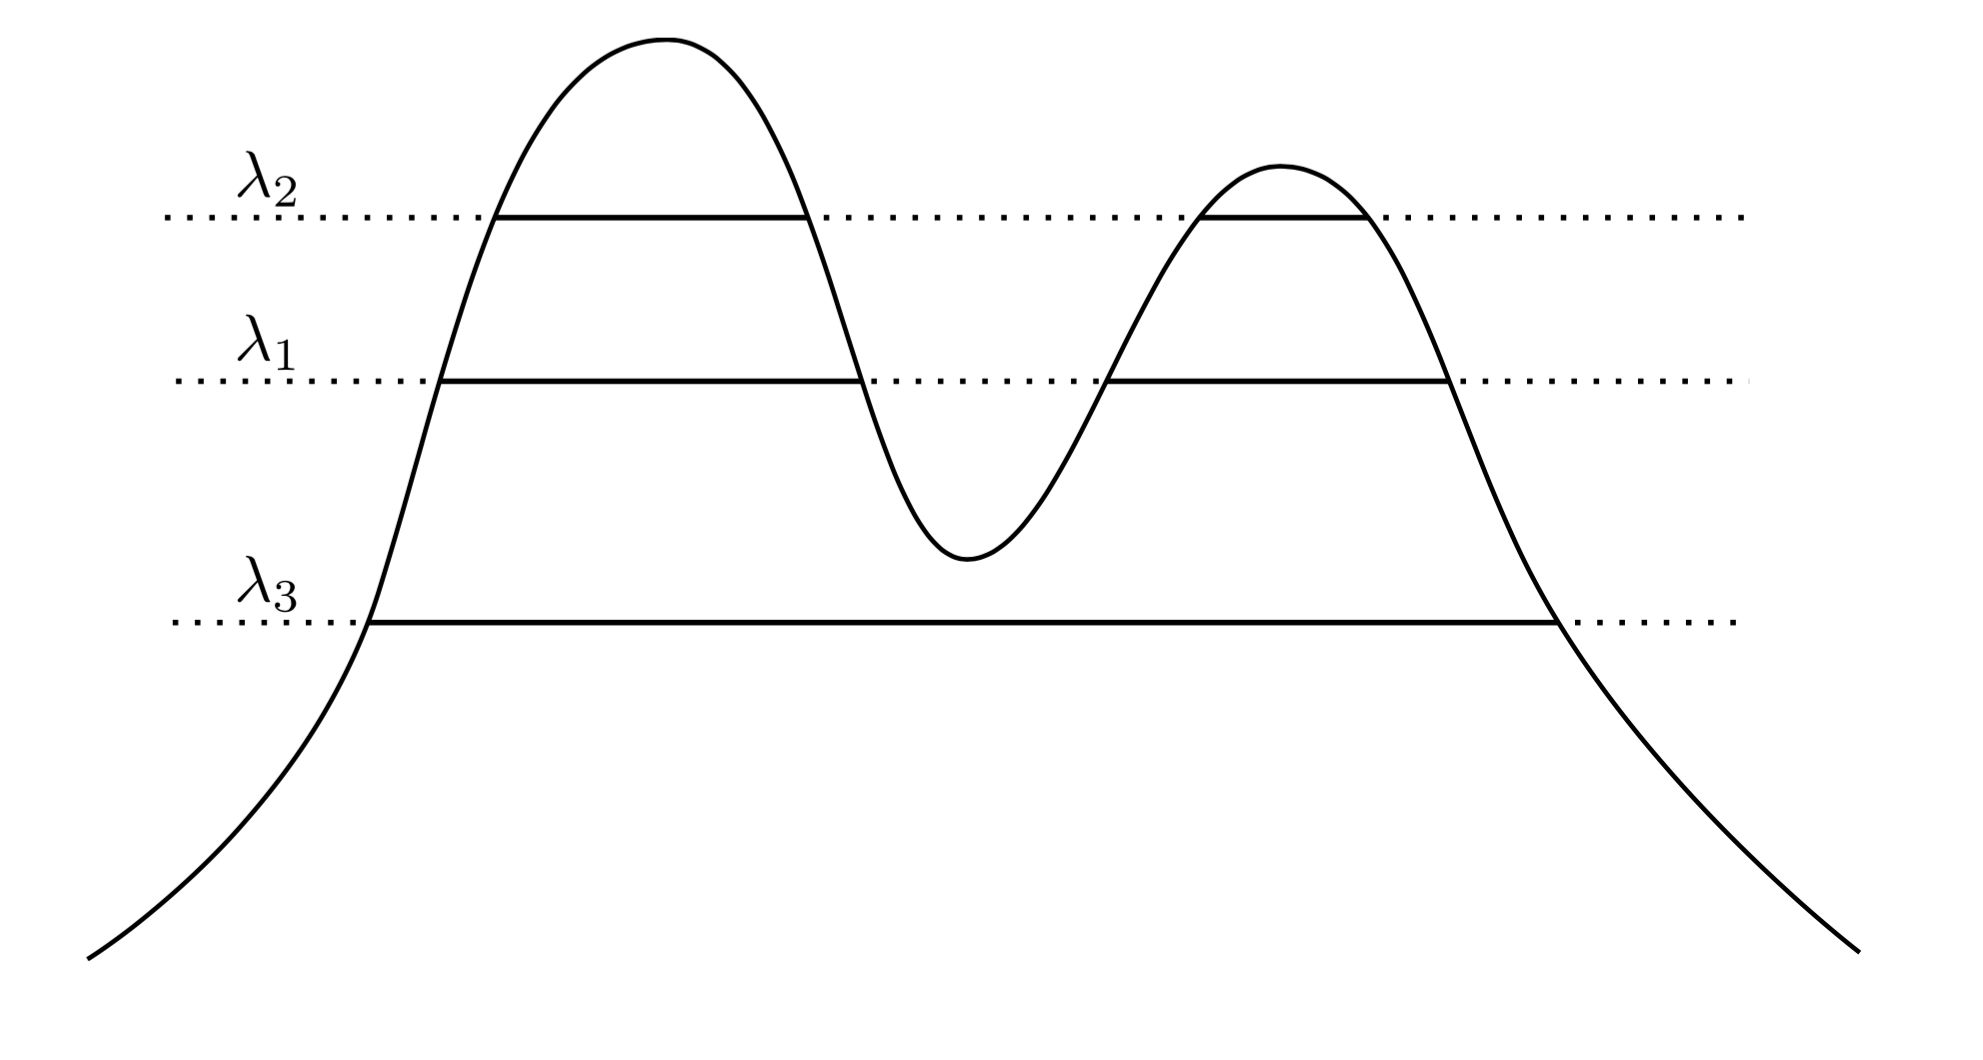

<a name="how-work"></a>
## Agglomerative (bottom-up) hierarchical clustering pseudo-code


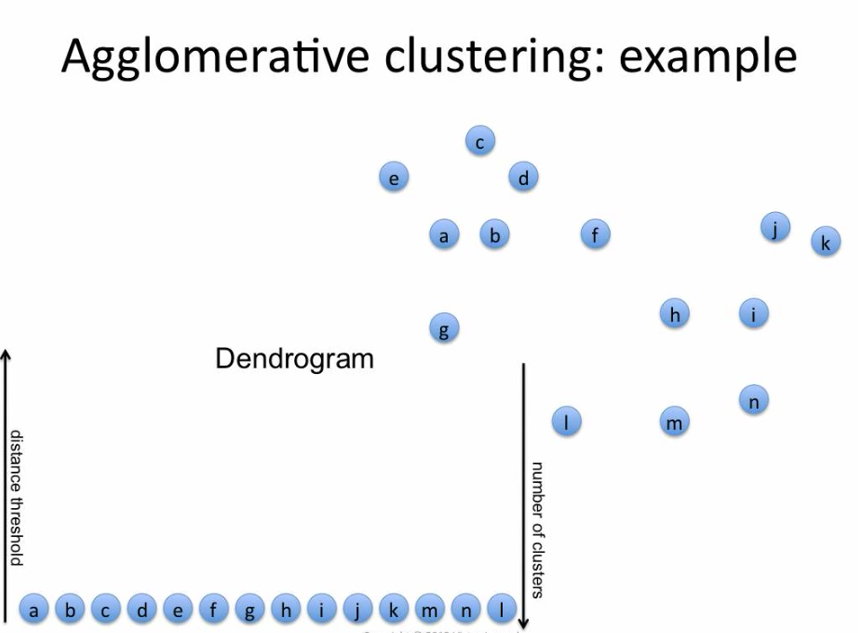

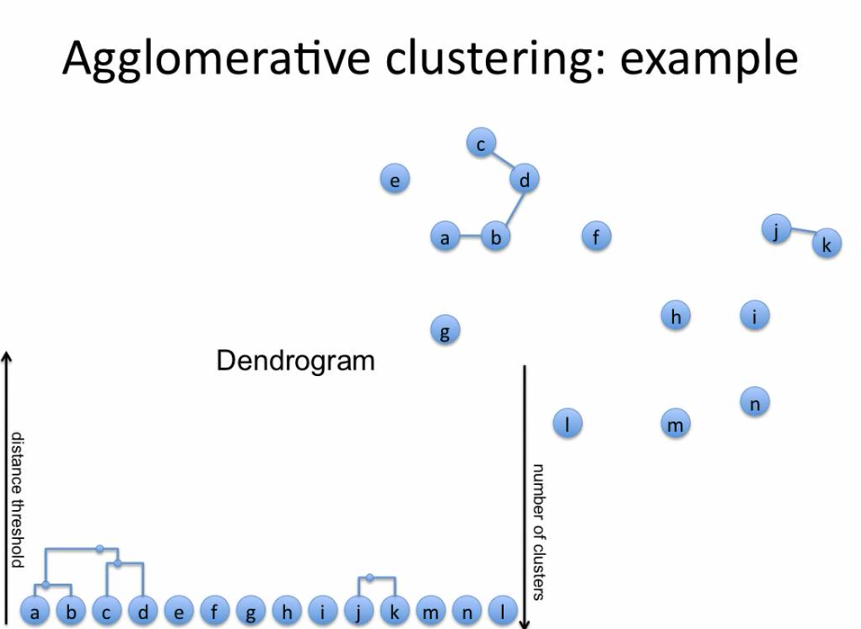

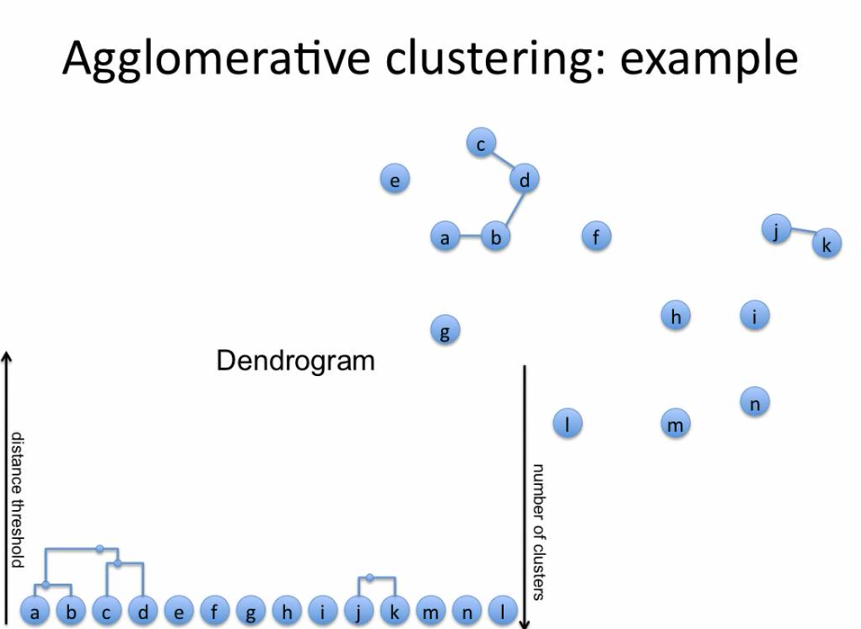

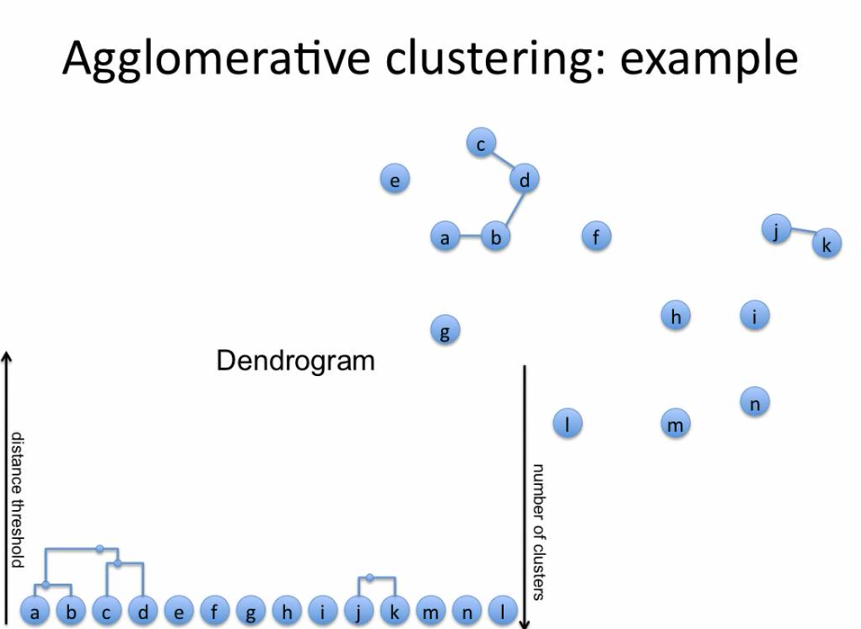

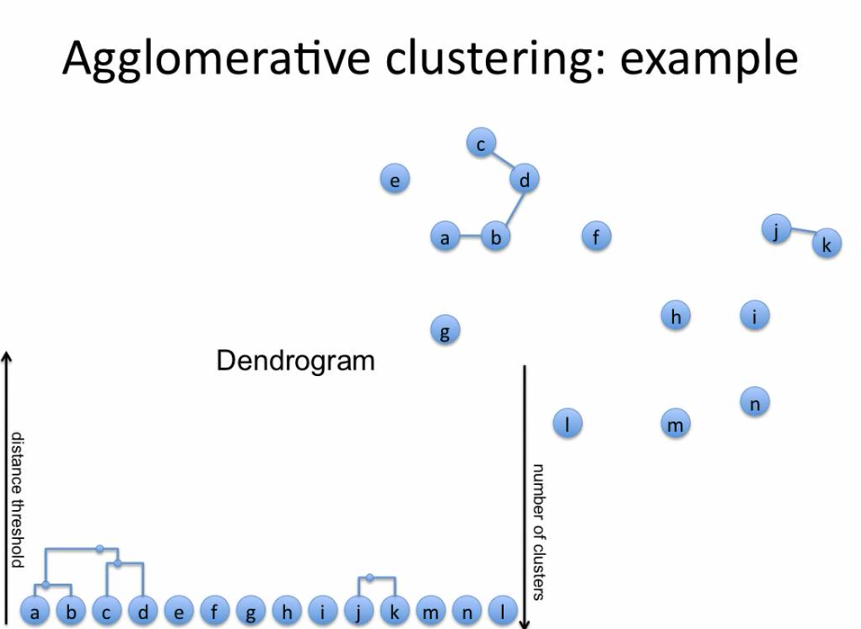

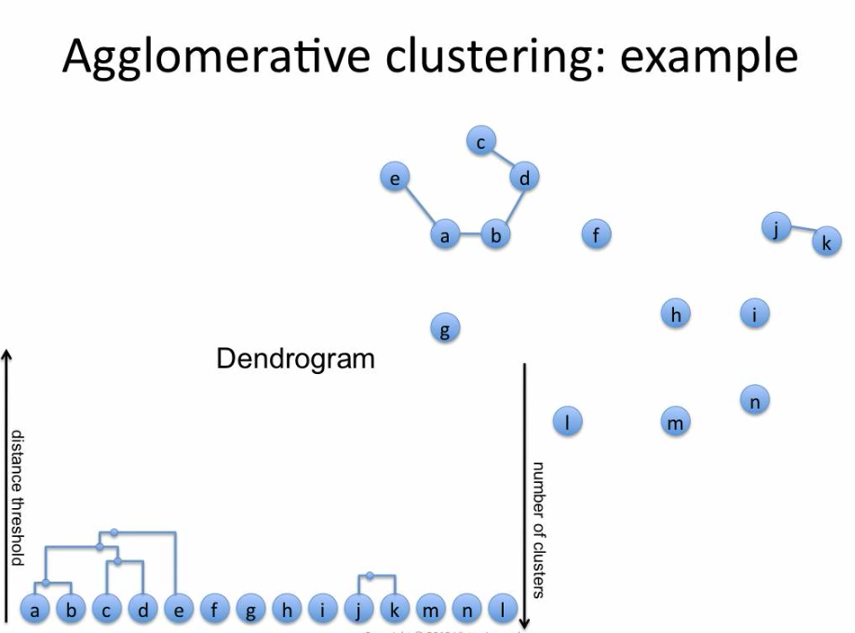

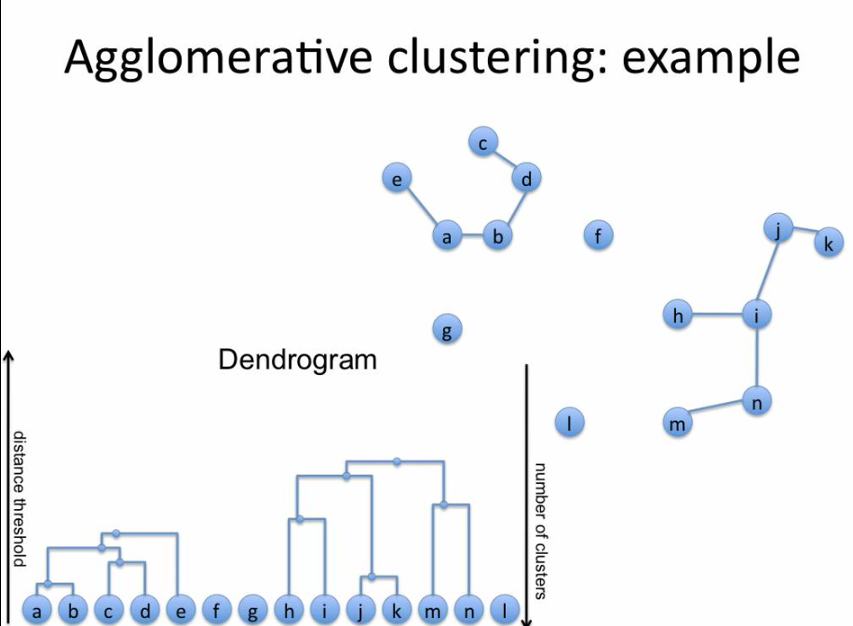

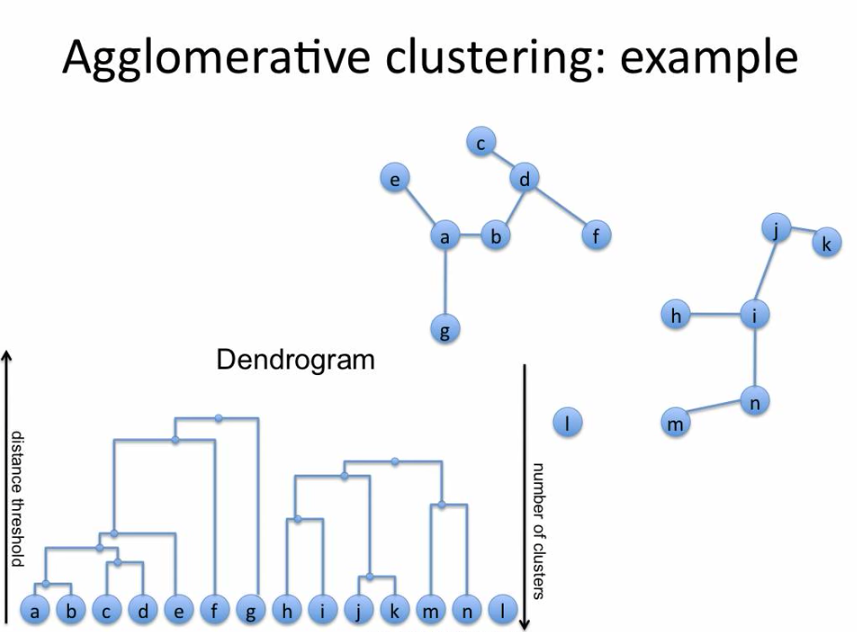

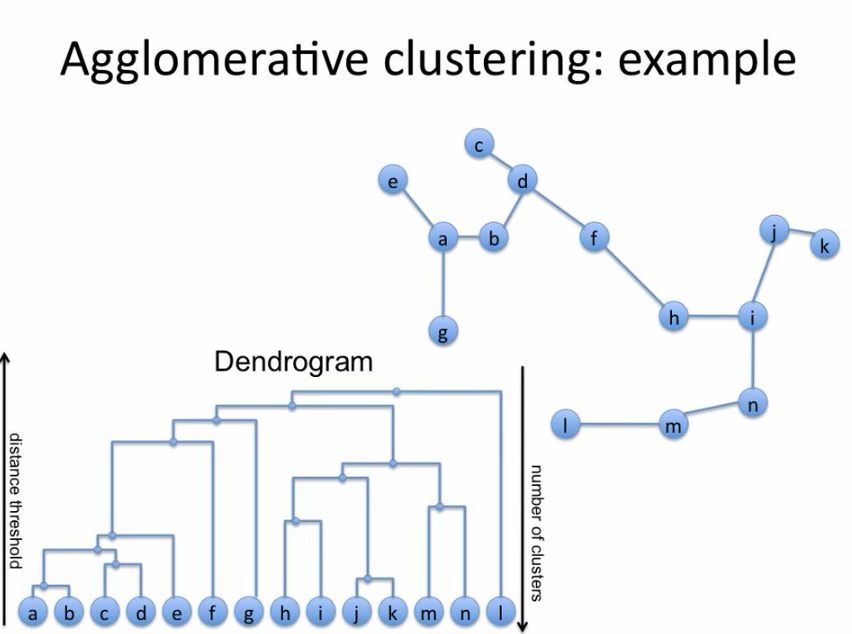

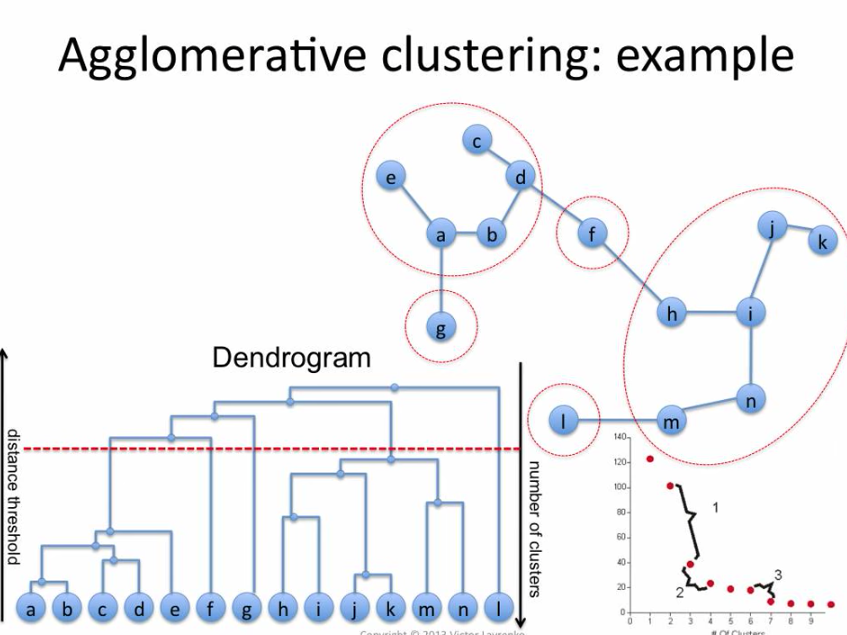

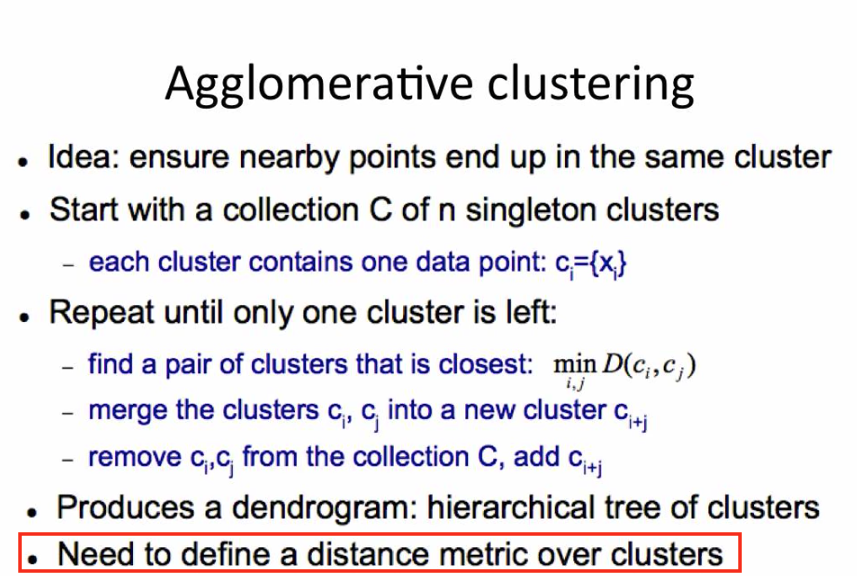

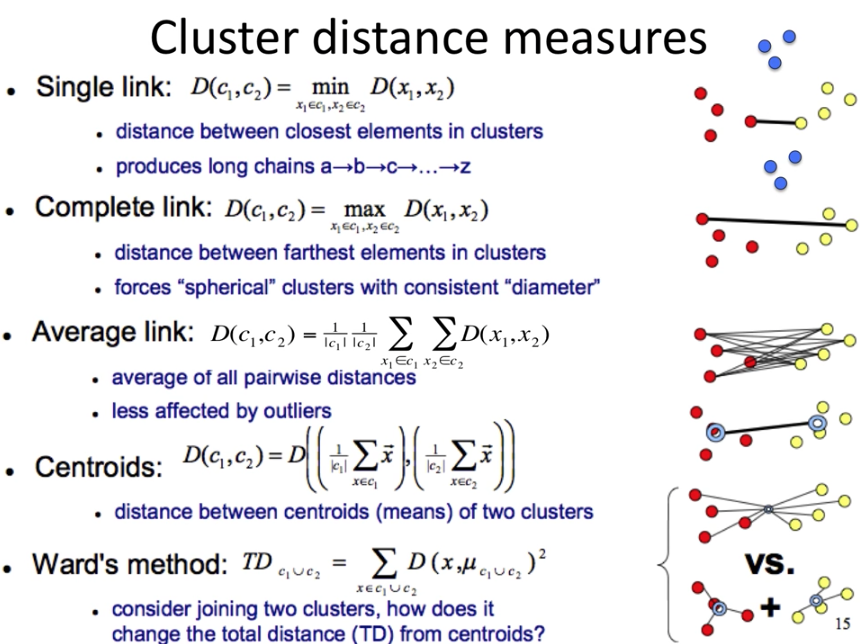

## We have see how the Hierarchical clustering algorithm works 

## => Let's see how we can implement it in python



<a id='python'></a>
## Hierarchical clustering in python

---

Implementing hierarchical clustering in python is as simple as calling a function from the SciPy toolbox:

```python
from scipy.cluster.hierarchy import linkage

Z = linkage(X, 'ward')
```

Here, "X" represents the matrix of data that we are clustering, and "ward" tells our algorithm which method to use to calculate distance between our newly formed clusters - in this case **Ward's Method** which seeks to minimize the variance when forming clusters. When calculating distance, the default is **Euclidean distance**.



## Evaluation with the cophenetic correlation coefficient

___

- Based on interpoint distance within clusters
- Considers $MIN(C_i)$ when looking at distance between clusters (product moment correlation)
- Values closer to $1$ are considered good in terms of "fusion" (how well clusters sit with each other)


```python
c, coph_dists = cophenet(Z, pdist(X))
```

Here, we call the cophenetic function using ```cophenet``` from SciPy:
```python
from scipy.cluster.hierarchy import cophenet
```

and apply it to our clustered set, Z, and the distance of our original set, X. 

[Detailed Cophenetic Coefficient Calculation](https://en.wikipedia.org/wiki/Cophenetic_correlation#Calculating_the_cophenetic_correlation_coefficient)

$$
c = \frac {\sum_{i<j} (x(i,j) - \bar{x})(t(i,j) - \bar{t})}{\sqrt{[\sum_{i<j}(x(i,j)-\bar{x})^2] [\sum_{i<j}(t(i,j)-\bar{t})^2]}}.
$$





## Ploting the Dendrogram

___

After we cluster, we can calculate the dendrogram using a simple ```dendrogram()``` function from SciPy:
```python
from scipy.cluster.hierarchy import dendrogram
```

which we can then draw using our handy  ```plt``` from matplotlib. 

<a name="guided-practice"></a>
## Visualizing hierarchical clustering on language skills data

---

Let's say that you're asked to perform hierarchical clustering analysis on a new dataset - how would we go about it?

We're going to be using a dataset that details language skills from different European countries. We will perform a hierarchical clustering analysis on this dataset.


In [1]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist
import numpy as np
import pandas as pd
import os
import seaborn as sns
from scipy.cluster.hierarchy import fcluster, cophenet
# Override the default linewidth.
plt.rcParams['lines.linewidth'] = 1
%matplotlib inline

We're going to be using **scipy** for our analysis. Let's load in the dataset using Pandas ```read.csv()``` and check the head to see it's structure

In [2]:
lang = pd.read_csv("./datasets/lang.csv")
lang.head()

country  finnish  swedish  danish  norwegian  english  german  dutch  \
0        1        0        0       0          0       21     100      2   
1        2        0        0       0          0        5       3      0   
2        3        0        2       3          0       10       7      1   
3        4        0        0       0          0       41      47    100   
4        5        0        0       0          0       14      15      0   

   flemish  french  italian  spanish  portuguese  
0        1      10        2        1           0  
1        0      11      100        1           0  
2        1     100       12        7           1  
3      100      16        2        2           0  
4       59      44        2        1           0

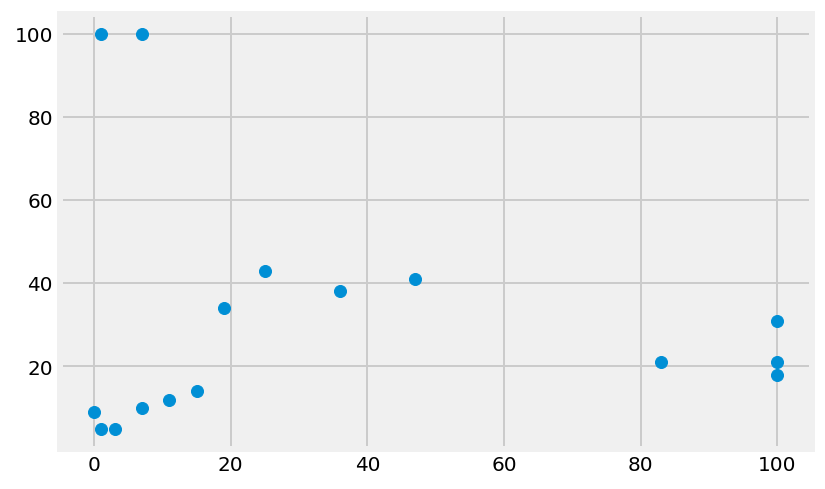

In [3]:
# How many clusters does it look like we have?
plt.scatter(lang['german'], lang['english'])
plt.show()

Now, let's convert our data to a matrix (aka array) to pass to the clustering algorithm - the matrix makes it easier for our algorithm to compute distance:

In [4]:
X = lang.as_matrix(columns=None)

/Users/aymericflaisler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


Next, we'll implement the actual clustering algorithm using the **`ward`** method (described in detail earlier):

In [5]:
Z = linkage(X, 'ward')
Z

array([[  0.        ,   8.        ,  10.48808848,   2.        ],
       [  6.        ,  15.        ,  17.29161647,   2.        ],
       [  5.        ,   9.        ,  37.12142239,   2.        ],
       [  2.        ,   4.        ,  82.06704576,   2.        ],
       [ 16.        ,  18.        , 103.69667304,   4.        ],
       [ 11.        ,  12.        , 115.41230437,   2.        ],
       [ 10.        ,  21.        , 119.93887332,   3.        ],
       [  1.        ,  19.        , 133.66500415,   3.        ],
       [ 14.        ,  23.        , 139.49253266,   4.        ],
       [  7.        ,  24.        , 142.18473898,   5.        ],
       [ 13.        ,  25.        , 148.66068747,   6.        ],
       [ 17.        ,  22.        , 158.59529207,   5.        ],
       [  3.        ,  20.        , 191.10991602,   5.        ],
       [ 26.        ,  27.        , 192.04241956,  11.        ],
       [ 28.        ,  29.        , 226.23253323,  16.        ]])

Now we can calculate the cophenetic correlation coefficient to see how well our algorithm has measured the distances between the points:

In [6]:
c, coph_dists = cophenet(Z, pdist(X))

In [7]:
c

0.6664592560324294

You should see a **C** around **0.667**, which means that the distances of the clusters are moderately related to the original distances of the data.

Now, let's plot the dendrogram. To do this, we call dendrogram from  scipy.cluster.hierarchy and input our links, and rotate the labels so we can view the graph in a more organized matter. 

#### We can then plot the denrogram with pyplot from matplotlib.

/Users/aymericflaisler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


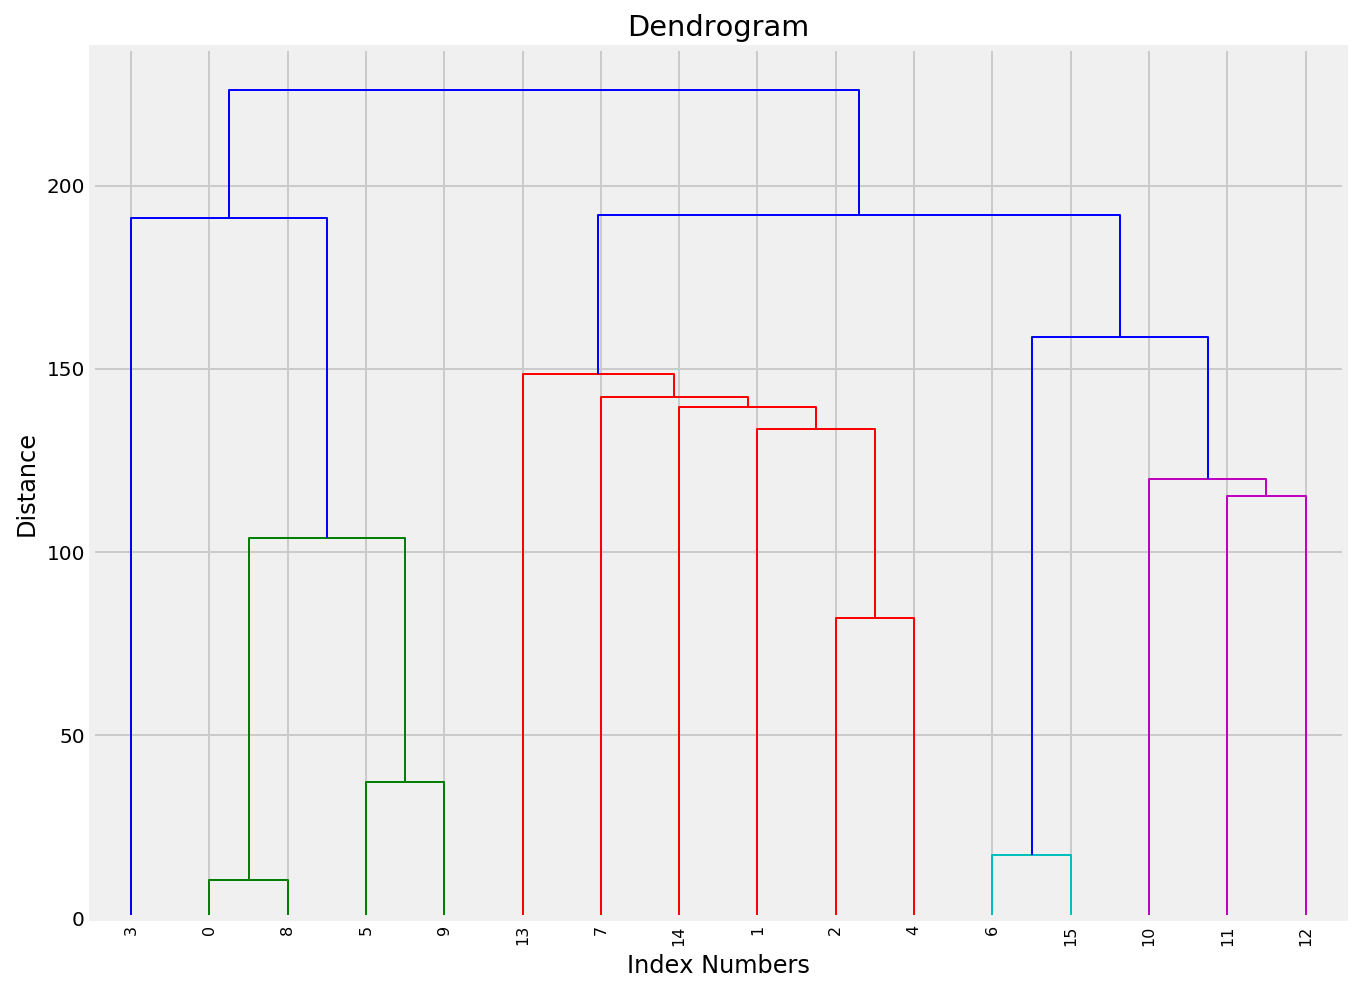

In [8]:
def plot_dendogram(df):
    
    # Data prep
    X = df.as_matrix(columns=None)
    Z = linkage(X, 'ward')
    
    # plotting
    fig, ax = plt.subplots(figsize=(10,8))
    plt.title('Dendrogram')
    plt.xlabel('Index Numbers')
    plt.ylabel('Distance')
    dendrogram(
        Z,
        leaf_rotation=90.,  
        leaf_font_size=8.,
    )
    plt.show()
    
    
plot_dendogram(lang)

### Determining the clusters

While there are many ways to automate this process, we can visually assess the dendrogram and set a maximum distance to help estimate the clusters.

Here, we can see that no links exist above a distance of 200 - use the ```fclusters``` function from ```scipy.cluster.hierarchy``` with this max distance to return our cluster IDs. 

In [9]:
max_dist = 200 # pairwise distance
clusters = fcluster(Z, max_dist, criterion='distance')
clusters

array([1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2], dtype=int32)

Last, let's plot our data and assign the class labels as the color:

In [10]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
from ipywidgets import *

In [17]:
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap
import matplotlib.cm as cm

def plot_dist_thresh(max_dist=200):
    # max_dist = 200 # pairwise distance
    # plot_dendogram(lang)
    clusters = fcluster(Z, max_dist, criterion='distance')
    
    print("Clusters represented at distance: ", set(clusters))
    
    # Complete color maps from matplotlib
    
    # plotting
    # Add legend with some customizations.
    
    fig, ax = plt.subplots(1, 2, figsize=(14, 8))

    ax[0].scatter(X[:,0], X[:,6], c=clusters, cmap=cm.jet, s=40)

    ax[0].set_title("Max Dist: %d" % max_dist)
    
    # plt.legend(clusters, loc='upper right', shadow=True, scatterpoints=1)
    
#     ax[0].legend(['c{}'.format(i) for i in range(len(clusters))], loc=2, bbox_to_anchor=(1.05, 1), borderaxespad=0., fontsize=11)
        
    t = (0, max_dist)
    ax[1].plot((0, 200), (max_dist, max_dist), 'r--')
    
    ax[1].set_title('Dendrogram')
    ax[1].set_xlabel('Index Numbers')
    ax[1].set_ylabel('Distance')
    dendrogram(
        Z,
        leaf_rotation=90.,  
        leaf_font_size=8.
#         link_color_func=lambda color: cm['Miscellaneous'],
    )
    
def plot_wrapper(max_dist):
    plot_dist_thresh(max_dist)
    plt.show()

In [18]:
interact(plot_wrapper, max_dist=IntSlider(min=100, max=200, step=1));

interactive(children=(IntSlider(value=100, description='max_dist', max=200, min=100), Output()), _dom_classes=('widget-interact',))

Once you decided a threshold level, you can get the cluster using the `fcluster` function:

In [19]:
max_dist = 150
clusters = fcluster(Z, max_dist, criterion='distance')
clusters

array([1, 3, 3, 2, 3, 1, 4, 3, 1, 1, 5, 5, 5, 3, 3, 4], dtype=int32)

### Using the inconsistency with the elbow method

In [56]:
from scipy.cluster.hierarchy import inconsistent

depth = 5
incons = inconsistent(Z, depth)
incons[-10:]

array([[115.41230437,   0.        ,   1.        ,   0.        ],
       [117.67558885,   3.2007676 ,   2.        ,   0.70710678],
       [107.86602495,  36.48526627,   2.        ,   0.70710678],
       [118.40819419,  31.60695056,   3.        ,   0.66707917],
       [124.35233039,  28.41356313,   4.        ,   0.62760198],
       [129.2140018 ,  26.90124853,   5.        ,   0.72289157],
       [102.80952156,  60.21519495,   4.        ,   0.92644009],
       [ 85.60402498,  80.52288211,   4.        ,   1.31025975],
       [129.69816323,  47.80633981,   9.        ,   1.30410018],
       [123.25131523,  67.25287446,  13.        ,   1.53125378]])

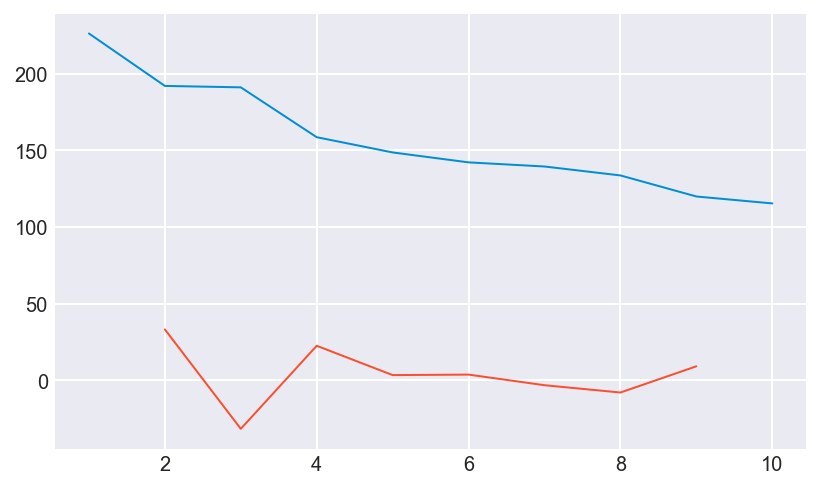

clusters: 2


In [57]:
last = Z[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)  
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2  # if idx 0 is the max of this we want 2 clusters
print("clusters:", k)

<img src="https://snag.gy/YUt5RO.jpg" style="float: left; margin-right: 25px; width: 250px">

## Pair questions:

- Recap and recall the process steps of hierachical clustering (without looking at the pseudo code...)
- What are the benefits of hierachical clustering over the Kmeans algorithm ?
- What are the limitations of hierachical clustering?

<a id='resources'></a>
## Additional resources 

---

- [SciPy Documentation for Linkage techniques](http://docs.scipy.org/doc/scipy-0.16.0/reference/generated/scipy.cluster.hierarchy.linkage.html)
- [What even is this Hierarchical Clustering Thing, Anyway?](http://www.saedsayad.com/clustering_hierarchical.htm)
- [SKlearn docs](http://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering) on hierarchical clustering
- [Stanford walkthrough of hierarchical clustering](http://www.econ.upf.edu/~michael/stanford/maeb7.pdf)
- [Wikipedia](https://en.wikipedia.org/wiki/Hierarchical_clustering) on hierarchical clustering
- [Example of hierarchical clustering US cities](http://www.analytictech.com/networks/hiclus.htm)
- [Cophenetic correlation wikipedia](https://en.wikipedia.org/wiki/Cophenetic_correlation) on cophrenetic coefficients
- [Cophenetic intuitive explanation](http://people.revoledu.com/kardi/tutorial/Clustering/Cophenetic.htm) of cophrenetic coefficients
- [Joseph Nelson's video](https://www.youtube.com/watch?v=62cphKGR0_s) explaining hierarchical clustering in seven minutes 
- A contrasting example of differing [cophrenetic coefficients](http://stats.stackexchange.com/questions/33066/on-cophenetic-correlation-for-dendrogram-clustering)